# Performimg exploratory data analysis

In [13]:
#imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [14]:
df.head()

,Reviews,Ratings,Aircraft Type,Traveller,Countries,Flight Ticket,Route,Date Flown,Seat Comfort /5,Cabin Staff Services /5,Food and beverages /5,Ground service /5,Value for money /5,Recommended,verified,corpus
1,✅ Trip Verified | Would happily fly them agai...,10.0,Boeing 777 / A320,Solo Leisure,United States,Economy Class,New York to Istanbul via London,March 2023,5.0,5.0,5.0,5.0,5,yes,True,would happily fly personal emergency allowed r...
3,✅ Trip Verified | First our morning flight wa...,1.0,A321neo,Business,Canada,Business Class,London to Cairo,January 2023,1.0,2.0,1.0,3.0,1,no,True,first morning flight cancelled moved afternoon...
4,✅ Trip Verified | Although it was a bit uncom...,8.0,Boeing 787,Solo Leisure,United Kingdom,Economy Class,London Singapore,February 2023,3.0,5.0,5.0,5.0,4,yes,True,although bit uncomfortable flight economy flig...
5,✅ Trip Verified | Boarding was decently organ...,6.0,A380,Business,Belgium,Business Class,London to Dubai,February 2023,2.0,3.0,2.0,4.0,3,yes,True,boarding decently organised still rather stran...
6,✅ Trip Verified | Boarding on time and departu...,7.0,A320,Business,Belgium,Business Class,Brussels to London,February 2023,2.0,4.0,4.0,4.0,4,yes,True,boarding time departure time flight london hea...


In [3]:
# ratings mean
ratings_mean = df["Ratings"].mean()
print(ratings_mean)

# most common flight ticket
flight_ticket_mode = df["Flight Ticket"].mode()
print(flight_ticket_mode)

# most common airplane 
airplane_mode = df["Aircraft Type"].mode()
print(airplane_mode)

5.332551319648094
0    Economy Class
dtype: object
0    A320
dtype: object


Using the fact that A320 is the most used Aircraft, Calculating how well it does considering other factors

In [4]:
# calculating the highest starred aircraft
# Filter the DataFrame to include only A320 aircrafts
a320_df = df[df["Aircraft Type"] == "A320"]
# Calculate the mode of the "Seat Comfort /5" column for the filtered DataFrame
seat_comfort_mode = a320_df["Seat Comfort /5"].mode()
# Print the mode
print("The most common seat comfort rating for A320s is:", seat_comfort_mode)


# Filter the DataFrame to include only '5' seat_comfort ratings
seat_comfort_5 = df[df["Seat Comfort /5"] == 5]
# Calculate the mode of the aircraft column for the filtered DataFrame
aircraft_mode = seat_comfort_5["Aircraft Type"].mode()
# Print the mode
print("The most common Aircraft Type for Seat comfort rating '5' is:", aircraft_mode)


# Filter the DataFrame to include only '5' cabin ratings
cabin_5 = df[df["Cabin Staff Services /5"] == 5]
# Calculate the mode of the aircraft column for the filtered DataFrame
aircraft_mode = cabin_5["Aircraft Type"].mode()
# Print the mode
print("The most common Aircraft Type for cabin staff service rating '5' is:", aircraft_mode)

# Filter the DataFrame to include only '5' FnB ratings
FnB_5 = df[df["Food and beverages /5"] == 5]
# Calculate the mode of the aircraft column for the filtered DataFrame
aircraft_mode = FnB_5["Aircraft Type"].mode()
# Print the mode
print("The most common Aircraft Type for Food and Beverages rating '5' is:", aircraft_mode)


# Filter the DataFrame to include only '5' groundt ratings
ground_5 = df[df["Ground service /5"] == 5]
# Calculate the mode of the aircraft column for the filtered DataFrame
aircraft_mode = ground_5["Aircraft Type"].mode()
# Print the mode
print("The most common Aircraft Type for Ground Service rating '5' is:", aircraft_mode)


# Filter the DataFrame to include only '5' value ratings
value_5 = df[df["Value for money /5"] == 5]
# Calculate the mode of the aircraft column for the filtered DataFrame
aircraft_mode = value_5["Aircraft Type"].mode()
# Print the mode
print("The most common Aircraft Type for Value for Money rating '5' is:", aircraft_mode)


# Filter the DataFrame to include only rows where the "Recommended" column is True
recommended = df[df["Recommended"] == "no"]
# Calculate the mode of the "Aircraft Type" column for the filtered DataFrame
aircraft_mode = recommended["Aircraft Type"].mode()
# Print the mode
print("The most Recommended aircraft is:", aircraft_mode)

The most common seat comfort rating for A320s is: 0    3.0
dtype: float64
The most common Aircraft Type for Seat comfort rating '5' is: 0    A380
dtype: object
The most common Aircraft Type for cabin staff service rating '5' is: 0    A320
dtype: object
The most common Aircraft Type for Food and Beverages rating '5' is: 0    A320
dtype: object
The most common Aircraft Type for Ground Service rating '5' is: 0    A320
dtype: object
The most common Aircraft Type for Value for Money rating '5' is: 0    A320
dtype: object
The most Recommended aircraft is: 0    Boeing 777
dtype: object


Text(0.5, 0.98, 'Counts for each ratings')

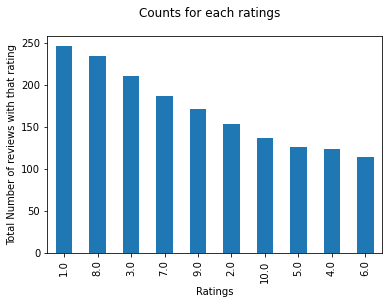

In [5]:
df.Ratings.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

Text(0.5, 0.98, 'Counts for each ratings')

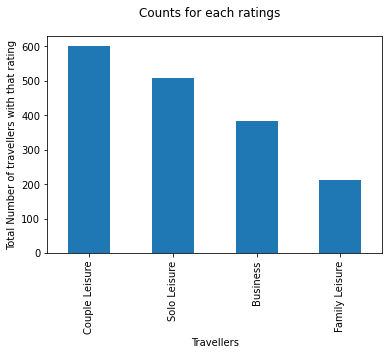

In [6]:
df.Traveller.value_counts().plot(kind="bar")
plt.xlabel("Travellers")
plt.ylabel("Total Number of travellers with that rating")
plt.suptitle("Counts for each ratings")

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

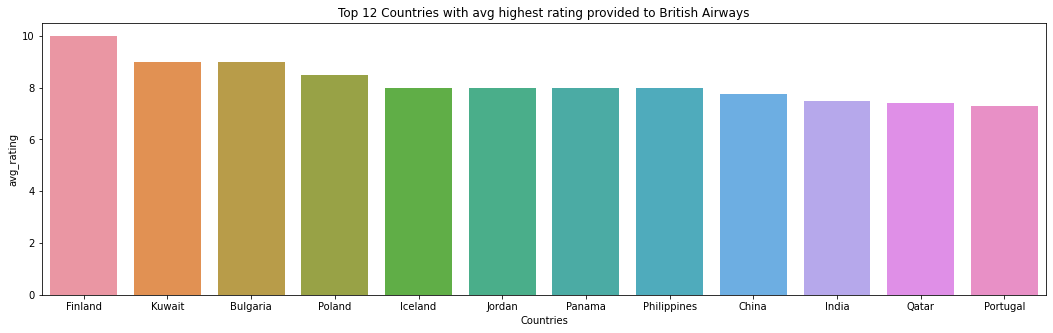

In [9]:
df_country_rating = pd.DataFrame(df.groupby('Countries').mean()['Ratings'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'Ratings':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='Countries', y='avg_rating', data=df_country_rating[:12])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

# Load the dataset
cwd = os.getcwd()
df = pd.read_csv(cwd + "/cleaned-BA-reviews.csv", index_col=0)

# Check the structure of the dataset
print(df.head())
print(df.info())

# Explore the variables and their distributions
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values
# Drop columns with a large number of missing values
df = df.drop(['column_name'], axis=1)

# Replace missing values in other columns with the mean or mode
df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])

# Check for outliers
# Plot boxplots to check for outliers in numerical variables
num_cols = ['column1', 'column2']
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

# Identify and remove outliers
# Calculate the IQR (interquartile range) for each numerical variable
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Remove outliers based on the IQR
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check for correlations between variables
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# Create a wordcloud of the most frequent words in the reviews
text = ' '.join(df['review_text'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create scatter plots to visualize the relationship between numerical variables
fig = px.scatter(df, x='column1', y='column2', color='category_column')
fig.show()

# data cleaning
# Convert data types
df['column_name'] = df['column_name'].astype(float)

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)